In [17]:
###########################
## 53. 얼굴인식 소개하기 ##
###########################

######################################################
## Face Detection need very large cascade file(XML) ##
######################################################

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def display(image, cmap = 'gray'):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap)

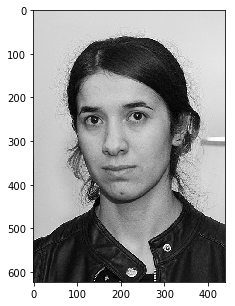

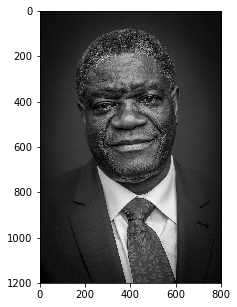

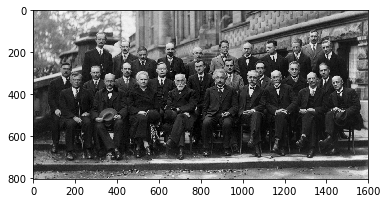

In [20]:
nadia = cv2.imread('../../DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('../../DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../../DATA/solvay_conference.jpg', 0)

display(nadia)
display(denis)
display(solvay)

In [21]:
##########################
# classfier list (6,000) #
##########################

face_cascade = cv2.CascadeClassifier('../../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [22]:
def detect_face(image):
    face_image = image.copy()
    face_rects = face_cascade.detectMultiScale(face_image)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_image, (x, y), (x + w, y + h), (255, 255, 255), thickness = 3)
    
    return face_image

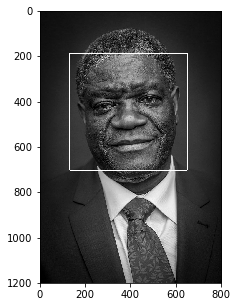

In [23]:
result = detect_face(denis)
display(result)

#############
## SUCCESS ##
#############

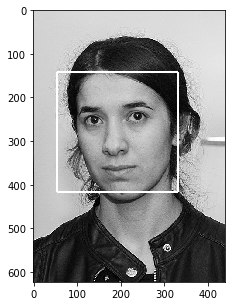

In [24]:
result = detect_face(nadia)
display(result)

#############
## SUCCESS ##
#############

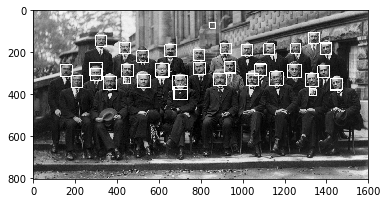

In [25]:
result = detect_face(solvay)
display(result)

#############################################
## FAILURE                                 ##
##  1. 매개변수 조정                       ##
##  2. Add Scale Factor & Minimum Neighbor ##
#############################################

In [26]:
def adj_detect_face(image):
    face_image = image.copy()
    face_rects = face_cascade.detectMultiScale( # Adjust
        face_image,
        scaleFactor = 1.2,
        minNeighbors = 5
    )
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_image, (x, y), (x + w, y + h), (255, 255, 255), thickness = 3)
    
    return face_image

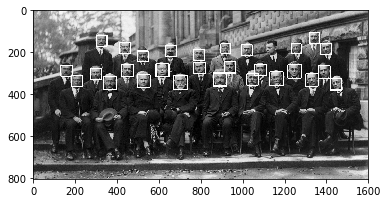

In [27]:
result = adj_detect_face(solvay)
display(result)

In [28]:
eye_cascade = cv2.CascadeClassifier('../../DATA/haarcascades/haarcascade_eye.xml')

In [29]:
def detect_eyes(image):
    eye_image = image.copy()
    eye_rects = eye_cascade.detectMultiScale(
        eye_image,
        scaleFactor = 1.2,
        minNeighbors = 5
    )
    
    for (x, y, w, h) in eye_rects:
        cv2.rectangle(eye_image, (x, y), (x + w, y + h), (255, 255, 255), thickness = 3)
    
    return eye_image

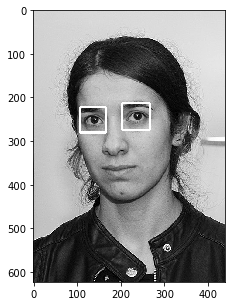

In [30]:
result = detect_eyes(nadia)
display(result)

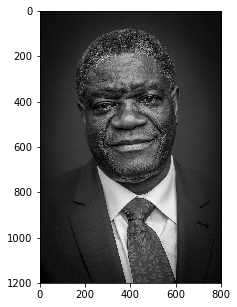

In [31]:
result = detect_eyes(denis)
display(result)

#############################################
## FAILURE                                 ##
##  1. 매개변수 조정                       ##
##  2. Add Scale Factor & Minimum Neighbor ##
#############################################

In [32]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == 27: # ESC
        break

cap.release()
cv2.destroyAllWindows()